In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 10
%matplotlib inline

In [3]:
# 데이터 loading
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
beer = pd.read_csv("data/5-1-1-beer.csv")
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

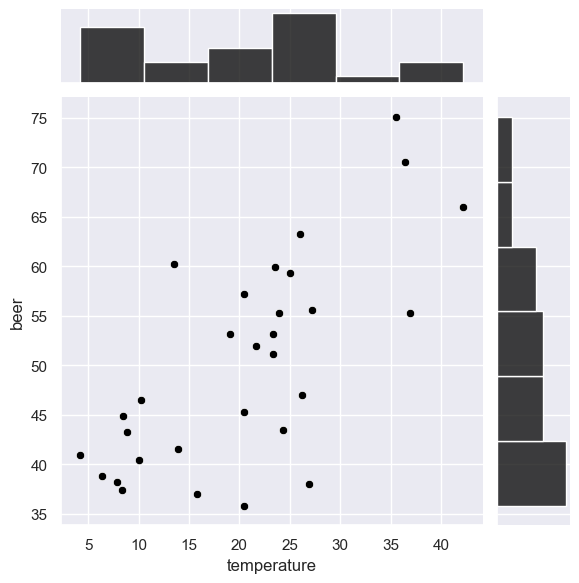

In [5]:
sns.jointplot(x="temperature", y="beer", data=beer, color='black')

5.1.3 모델구축 5.1.4 statsmodels를 이용한 모델링링

In [40]:
import statsmodels.formula.api as smf

lm_model = smf.ols(formula="beer ~temperature", data=beer).fit()
#모집단분포가 정규분포일때, 최대우도법의 결과는 최소제곱법의 결과와 일치
# ols  Ordinary Least Squares 범용최소제곱법
# 모델의 구조 formula   beer 종속변수 temperature  독립변수

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.11e-05
Time:                        02:20:07   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p값의 경우, p가 매우 작으므로 계수가 0일때를 귀무가설로 두기때문에 유의미하게 0과 다르다는 의미 

 

5.1.7 AIC를 이용한 모델선택

In [41]:
null_model = smf.ols("beer ~1", data=beer).fit()  #독리변수없음음
null_model.aic

227.94194972563105

In [42]:
lm_model.llf

-102.45451467787719

In [43]:
lm_model.df_model  #독립변수의 수

1.0000000000

In [44]:
-2 * (lm_model.llf - (lm_model.df_model + 1))

208.90902935575437

5.1.9 seaborn 을 이용한 회귀직선 그래프 그리기

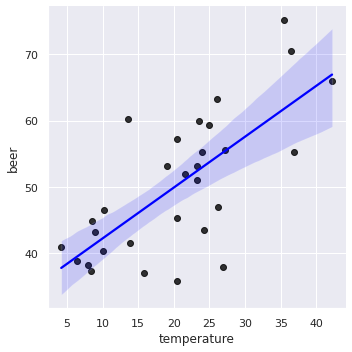

In [45]:
sns.lmplot(x="temperature", y="beer", data=beer, scatter_kws={"color": "black"}, line_kws={"color": "blue"})
#음영부분 회귀직선의 95% 신뢰구간간

In [46]:
#5.1.10 모델을 이용한 예측
lm_model.predict()

array([50.3014808048, 53.7459049498, 42.2644911333, 55.2002173665,
       46.7039711424, 37.8250111243, 44.9434876905, 54.5113325375,
       52.4446780506, 41.1163497517, 54.6644180551, 49.229882182 ,
       53.2101056383, 52.4446780506, 41.0398069929, 52.5977635681,
       45.2496587256, 61.7828946212, 55.4298456428, 50.3014808048,
       42.4175766509, 50.3014808048, 51.1434511514, 40.657093199 ,
       66.9112594592, 52.9039346032, 62.8544932441, 41.4225207868,
       62.4717794502, 39.5089518174])

In [47]:
lm_model.predict(pd.DataFrame({"temperature": [0]}))

0    34.610215
dtype: float64

In [48]:
lm_model.predict(pd.DataFrame({"temperature": [20]}))

0    49.918767
dtype: float64

In [49]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [50]:
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]

In [51]:
#5.1.11 잔차계산
resid = lm_model.resid
resid.head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [ ]:
y_hat = beta0 + beta1 * beer.temperature
y_hat.he

0    50.301481
1    53.745905
2    42.264491
3    55.200217
4    46.703971
Name: temperature, dtype: float64